# Analysis of the results

Presentation of the comparison of accuracy between prediction models, with some possible explanation on the reasons of the overall performance.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
%store -r svc_accuracy
%store -r knn_accuracy
%store -r tree_accuracy
%store -r et_accuracy
%store -r rf_accuracy
%store -r ada_accuracy
%store -r y_test
%store -r et_cnf_matrix 
%store -r rnf_cnf_matrix 
%store -r ada_cnf_matrix 
%store -r rbf_cnf_matrix 
%store -r knn_cnf_matrix 
%store -r tree_cnf_matrix

In [3]:
algorithm = ['svc', 'knn', 'tree', 'et', 'rf', 'ada']
accuracy = [svc_accuracy, knn_accuracy, tree_accuracy, et_accuracy, rf_accuracy, ada_accuracy]

In [4]:
df = pd.DataFrame(columns = ['algorithm', 'accuracy'])
df['algorithm'] = algorithm
df['accuracy'] = accuracy

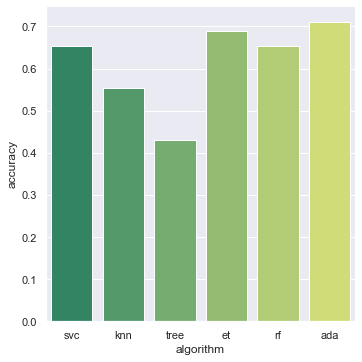

In [16]:
g = sns.catplot(x="algorithm", y="accuracy", data = df, kind = "bar", palette = 'summer')
plt.savefig('plots/performance.png')

In [9]:
## summing the confision matrix to check with genres are overlapping with wring prediction the most 
matrix = et_cnf_matrix + rnf_cnf_matrix + ada_cnf_matrix + rbf_cnf_matrix + knn_cnf_matrix + tree_cnf_matrix

In [27]:
matrix

array([[122,   3,  28,   6,   5,   7,  17,   0,  12,  10],
       [  1, 190,   7,   0,   0,   7,   0,   0,   4,   1],
       [ 17,   3, 102,  11,   9,  21,   0,  22,   4,  21],
       [  8,   3,  11, 106,  26,   2,   7,   6,  11,  30],
       [  1,   1,  12,  23, 112,   1,  17,  15,  18,  10],
       [  8,  24,  18,  15,   6, 120,   3,   5,   6,   5],
       [  9,   0,   0,  10,  12,   0, 166,   1,   0,  12],
       [  0,   2,   8,  20,  14,  11,   0, 142,  12,   1],
       [ 17,   2,  23,  20,  24,  10,   6,   3,  94,  11],
       [ 14,   1,  30,  43,  12,  12,   8,   7,  18,  65]])

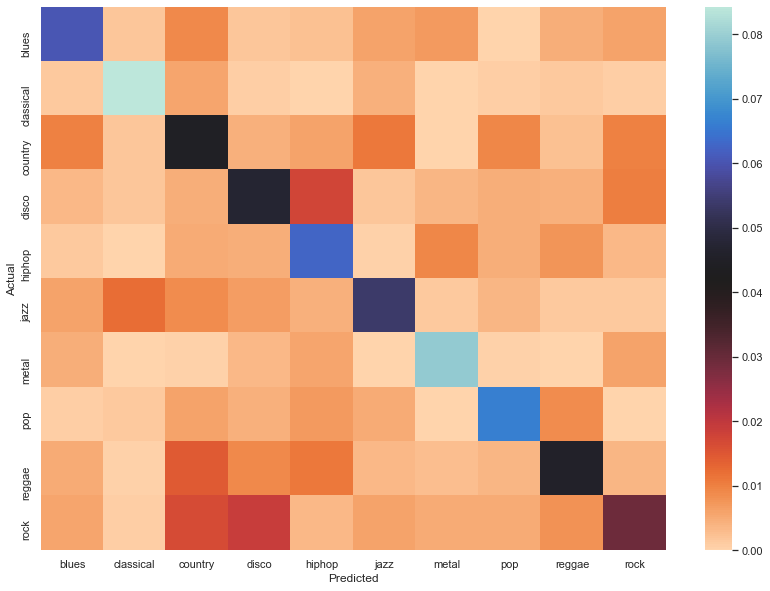

In [17]:
data = matrix
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (14,10))
sns.set(font_scale=1.0)#for label size
sns.heatmap(df_cm/np.sum(data), cmap="icefire_r", annot_kws={"size": 10})# font size (to get percentage add annot=True, fmt='.1%')
plt.savefig('plots/confusion_matrix_complete.png')

It appears that the most mispredicted labels are rock, country, disco and reggae.

In [12]:
raw_data = pd.read_csv('data.csv')

In [13]:
## aggregating the music genres taking the mean of the features to explore similarities and correlations
genres = raw_data.groupby('label').mean()
genres = genres.transpose()
corr_genres = genres.corr()
corr_genres

label,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
label,,,,,,,,,,
blues,1.000000,0.994979,0.999938,0.997763,0.998485,0.999914,0.996036,0.997321,0.999650,0.999069
classical,0.994979,1.000000,0.994539,0.987870,0.989277,0.995925,0.986328,0.986346,0.992835,0.991025
country,0.999938,0.994539,1.000000,0.998008,0.998711,0.999826,0.996378,0.997630,0.999733,0.999242
disco,0.997763,0.987870,0.998008,1.000000,0.999910,0.997167,0.999440,0.999888,0.999128,0.999694
hiphop,0.998485,0.989277,0.998711,0.999910,1.000000,0.997986,0.999056,0.999800,0.999561,0.999898
jazz,0.999914,0.995925,0.999826,0.997167,0.997986,1.000000,0.995318,0.996684,0.999415,0.998644
metal,0.996036,0.986328,0.996378,0.999440,0.999056,0.995318,1.000000,0.999044,0.997802,0.998821
pop,0.997321,0.986346,0.997630,0.999888,0.999800,0.996684,0.999044,1.000000,0.998850,0.999430
reggae,0.999650,0.992835,0.999733,0.999128,0.999561,0.999415,0.997802,0.998850,1.000000,0.999812


<AxesSubplot:xlabel='label', ylabel='label'>

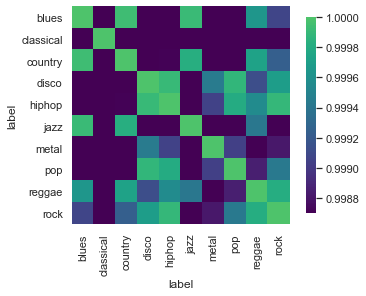

In [14]:
# f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_genres, cmap = "viridis", vmax = 1, vmin = 0.9987, center=0.9996,
            square=True, cbar_kws={"shrink": .90})

All the genres seems highly correlated,  however some of the genres are very close 1.0 such as rock and pop.

In [15]:
genres

label,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
tempo,120.742207,127.032280,110.858840,120.341798,113.976295,115.068143,125.610877,112.759957,129.364182,120.262441
beats,57.740000,57.120000,53.510000,58.100000,55.010000,54.930000,60.650000,54.090000,62.590000,57.640000
chroma_stft,0.341426,0.263536,0.343779,0.415676,0.454280,0.296621,0.479203,0.397496,0.408224,0.386318
rmse,0.136065,0.042958,0.125984,0.136309,0.178280,0.086661,0.153473,0.199727,0.122505,0.127324
spectral_centroid,1727.655327,1353.991363,1896.095815,2619.973550,2524.614443,1792.404455,2602.175432,3073.663995,2185.110737,2242.657140
spectral_bandwidth,1931.441744,1521.703911,2099.470533,2513.371079,2513.524297,2020.989762,2242.495535,3008.242455,2311.494296,2262.862522
rolloff,3637.073424,2482.527905,3949.254786,5520.111121,5333.917032,3750.383072,5125.196842,6655.048175,4594.244803,4669.264432
zero_crossing_rate,0.078983,0.077636,0.083407,0.129404,0.108005,0.076980,0.147506,0.133610,0.091594,0.109247
mfcc1,-164.600224,-320.007915,-145.045168,-93.712593,-103.074057,-214.541273,-63.060661,-67.860050,-162.554521,-110.335266
mfcc2,113.935444,141.267140,113.493170,84.886407,78.954644,114.409700,85.924207,67.958415,93.592145,101.100719


If the project run on two genres gives high performace, given the nature of the problem it is possible that a clear, always valid prediction of the right genres it is difficult. Music genre per se is a conventional classification and nowadays many genres are overlapping with each other.
Also, it should be taken into account that some genres are deriving from others, and some parameters might be quite similar.